# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [10]:
# TODO: Implementar a lógica de NPS em comandos simples e sequenciais (imperativo).

import pandas as pd
import gdown

file_id = '1x4uUUwncYXqhrgT8YKLfw4eA8JzCyVd3'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

dados = pd.read_csv('/content/feedbacks.csv', delimiter=';')


detratores = 0
promotores = 0

notas = dados['nota']
for nota in notas:
  if nota >=9:
    promotores +=1

  elif nota <=6:
    detratores += 1

nps = (promotores - detratores) / len(notas) *100

print(nps)


Downloading...
From: https://drive.google.com/uc?id=1x4uUUwncYXqhrgT8YKLfw4eA8JzCyVd3
To: /content/feedbacks.csv
100%|██████████| 265/265 [00:00<00:00, 828kB/s]

37.5


In [11]:
# TODO: Evoluir a implementação para separar melhor as responsabilidades (funcional).

import pandas as pd


notas = dados['nota']



def calcularNPS(notas):
  detratores = sum(notas.apply(lambda nota: nota<6))
  promotores = notas[notas >=9].count()

  return (promotores - detratores) / len(notas) *100

notas = dados['nota']



nps = calcularNPS(notas)

print(nps)




37.5


In [12]:
# TODO: Abstrair o problema usando classes e objetos (orientação a objetos).

import pandas as pd

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcularNPS(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <=6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    return (promotores - detratores) / len(notas) *100


dados = pd.read_csv('/content/feedbacks.csv', delimiter=';')

feedbacks = [Feedback(linha['nota'], linha['comentario']) for indice, linha in dados.iterrows() ]


analisador = AnalisadorFeedback(feedbacks)
analisador.calcularNPS()


37.5

## Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

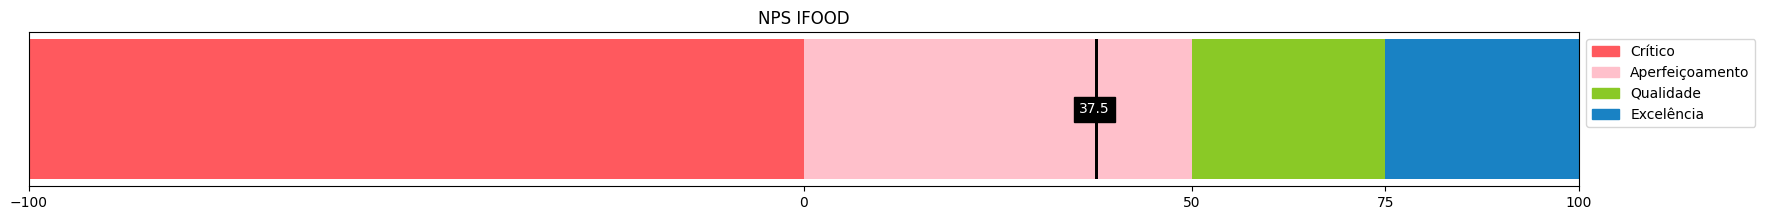

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# definição das constantes para visualizar O NPS

NPS_ZONAS = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES = ['#FF595E', 'pink', '#8AC926', '#1982C4']

def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(20, 2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh([0], width=0.4, left=nps, color='black')
  ax.set_yticks([])
  ax.set_xlim(-100, 100)
  ax.set_xticks(NPS_VALORES)

  plt.text(nps, 0, f'{nps:.1f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.title('NPS IFOOD')
  plt.show()

criar_grafico_nps(nps)




## Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.

In [9]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.8 MB/s eta 0:00:00


In [17]:
# Documentação Oficial da API OpenAI: https://platform.openai.com/docs/api-reference/introduction
# Informações sobre o Período Gratuito: https://help.openai.com/en/articles/4936830

# Para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

# Substitua o texto "TODO" por sua API Key da OpenAI, ela será salva como uma variável de ambiente.
openai_api_key = '************************************'

In [45]:
# TODO: Integrar com o ChatGPT e usá-lo como um modelo para análise de sentimentos dos nossos comentários.
# Seguem alguns links úteis:
# 1. Endpoint que vamos consumir: https://platform.openai.com/docs/api-reference/chat/create
# 2. Collection Postman da OpenAI: https://www.postman.com/devrel/workspace/openai/documentation/13183464-90abb798-cb85-43cb-ba3a-ae7941e968da

import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):
  comentarios_formatados = '\n'.join([f'-Nota {feedback.nota} {feedback.comentario}' for feedback in feedbacks])
  prompt = f"Sintetize uma análise geral dos seguintes comentários: {comentarios_formatados}"

  completion = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system",
           "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educaionais"},
          {
              "role": "user",
              "content" : prompt
              #"content": f"Análise os seguintes comentários: {feedbacks[4].comentario}"
          }
      ]
  )
  return completion.choices[0].message.content

insights = analisar_sentimentos(feedbacks)
print(insights)

Com base nos comentários dos usuários, podemos afirmar que a maioria teve uma experiência positiva com o bootcamp, com notas 10 e 9. 
Esses usuários elogiaram a experiência, considerando-a excelente, perfeita e top, e demonstraram interesse em participar novamente ou compartilhar com outras pessoas.

No entanto, alguns usuários tiveram percepções mais neutras ou negativas, com notas 8, 7 e 5. Esses usuários mencionaram que algumas questões 
poderiam ter sido melhoradas, que a experiência foi apenas ok ou nada de especial, e que acharam o bootcamp muito rápido e difícil de entender.

Portanto, o bootcamp geralmente recebeu notas positivas, indicando uma experiência educacional satisfatória. No entanto, é importante considerar
 as questões mencionadas pelos usuários que deram notas mais baixas, buscando maneiras de aprimorar o conteúdo, o ritmo e a clareza das informações fornecidas.
